In [144]:
# first neural network model with keras tutorial
#!pip install keras
#!pip install tensorflow 
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd


In [34]:
# load the dataset
ff=pd.read_csv("forestfires.csv")

In [35]:
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [36]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [37]:
ff.shape

(517, 31)

In [38]:
ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
ff.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [40]:
# check for duplicate data
duplicate = ff.duplicated()
print(duplicate.sum())

8


In [41]:
ff[duplicate]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [42]:
ff=ff.drop_duplicates()

In [43]:
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:>

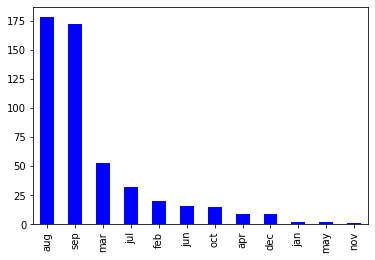

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
ff["month"].value_counts().plot(kind="bar",color="blue")

<AxesSubplot:>

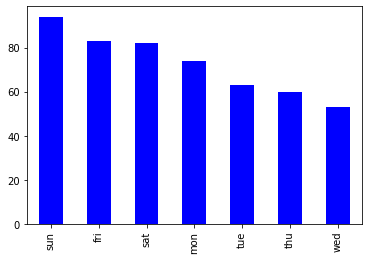

In [45]:
ff["day"].value_counts().plot(kind="bar",color="blue")

<AxesSubplot:>

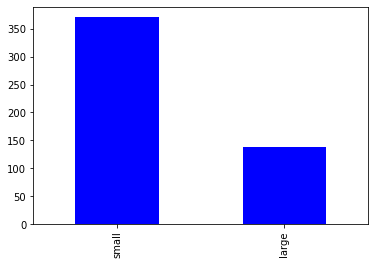

In [46]:
ff["size_category"].value_counts().plot(kind="bar",color="blue")

<AxesSubplot:>

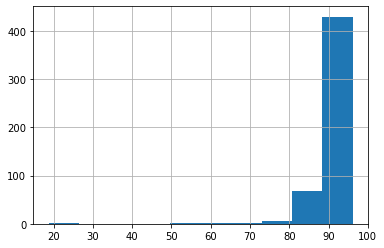

In [47]:
ff.FFMC.hist()

<AxesSubplot:>

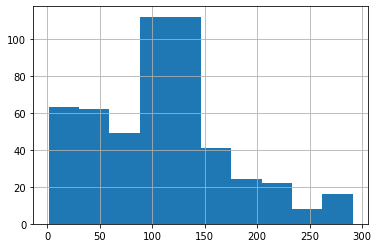

In [51]:
ff.DMC.hist()

<AxesSubplot:>

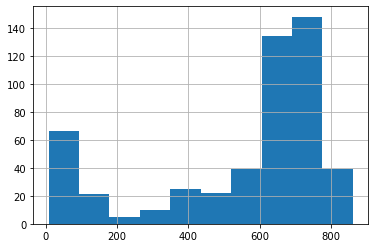

In [52]:
ff.DC.hist()

<AxesSubplot:>

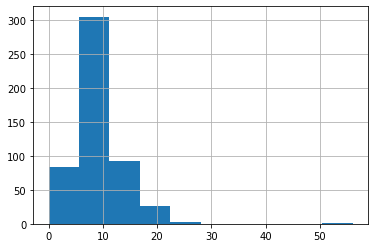

In [53]:
ff.ISI.hist()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

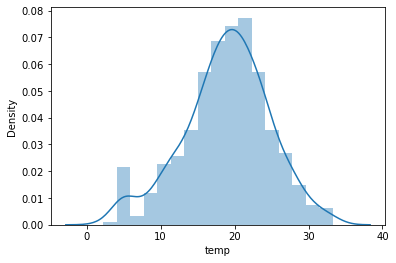

In [54]:
sns.distplot(ff["temp"],kde=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RH', ylabel='Density'>

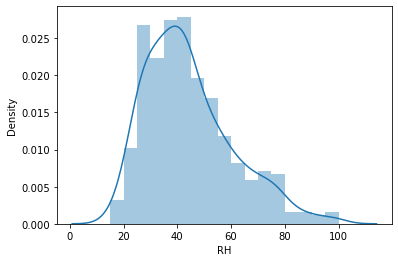

In [55]:
sns.distplot(ff["RH"],kde=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind', ylabel='Density'>

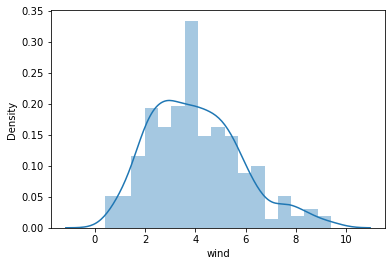

In [56]:
sns.distplot(ff["wind"],kde=True)

<AxesSubplot:>

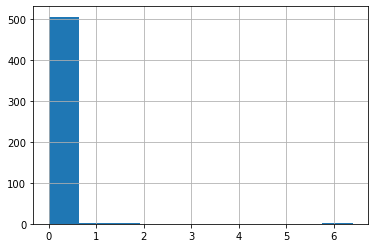

In [57]:
ff.rain.hist()

<AxesSubplot:>

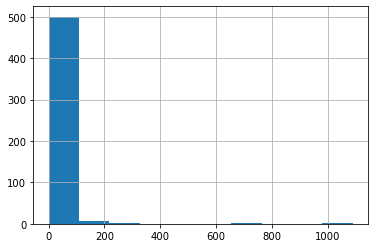

In [58]:
ff.area.hist()

In [60]:
##Data pre-processing/transformation
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
ff["month"] = LE.fit_transform(ff["month"])
ff["month"]

C:\Users\admin\AppData\Local\Temp\ipykernel_9160\2342289358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff["month"] = LE.fit_transform(ff["month"])


0       7
1      10
2      10
3       7
4       7
       ..
512     1
513     1
514     1
515     1
516     9
Name: month, Length: 509, dtype: int32

In [61]:
ff["day"] = LE.fit_transform(ff["day"])
ff["day"]

C:\Users\admin\AppData\Local\Temp\ipykernel_9160\2752573305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff["day"] = LE.fit_transform(ff["day"])


0      0
1      5
2      2
3      0
4      3
      ..
512    3
513    3
514    3
515    2
516    5
Name: day, Length: 509, dtype: int32

In [62]:
ff["size_category"] = LE.fit_transform(ff["size_category"])
ff["size_category"]

C:\Users\admin\AppData\Local\Temp\ipykernel_9160\558643139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff["size_category"] = LE.fit_transform(ff["size_category"])


0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int32

In [63]:
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# Split the dataset into X, Y variables 
array = ff.values
X = array[:,0:30]
Y = array[:,30]

In [65]:
X

array([[ 7. ,  0. , 86.2, ...,  0. ,  0. ,  0. ],
       [10. ,  5. , 90.6, ...,  0. ,  1. ,  0. ],
       [10. ,  2. , 90.6, ...,  0. ,  1. ,  0. ],
       ...,
       [ 1. ,  3. , 81.6, ...,  0. ,  0. ,  0. ],
       [ 1. ,  2. , 94.4, ...,  0. ,  0. ,  0. ],
       [ 9. ,  5. , 79.5, ...,  1. ,  0. ,  0. ]])

In [66]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [90]:
# define the keras model
model = Sequential()
model.add(Dense(60, input_dim=30, activation='relu'))  #input layer
model.add(Dense(30, activation='relu'))     #2nd layer
model.add(Dense(1, activation='sigmoid'))  #output layer

In [91]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
# fit the keras model on the dataset
history = model.fit(X, Y, epochs=150,validation_split=0.33, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 5ms/step - loss: 4.8251e-04 - accuracy: 1.0000 - val_loss: 0.2231 - val_accuracy: 0.9464
Epoch 2/150
35/35 [==============================] - 0s 4ms/step - loss: 5.0484e-04 - accuracy: 1.0000 - val_loss: 0.2123 - val_accuracy: 0.9464
Epoch 3/150
35/35 [==============================] - 0s 4ms/step - loss: 5.4128e-04 - accuracy: 1.0000 - val_loss: 0.2257 - val_accuracy: 0.9464
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 5.4366e-04 - accuracy: 1.0000 - val_loss: 0.2207 - val_accuracy: 0.9464
Epoch 5/150
35/35 [==============================] - 0s 4ms/step - loss: 4.9571e-04 - accuracy: 1.0000 - val_loss: 0.2214 - val_accuracy: 0.9464
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 4.6008e-04 - accuracy: 1.0000 - val_loss: 0.2086 - val_accuracy: 0.9464
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 4.1135e-04 - accuracy: 1.0000 - val_loss: 0.2203 - val_ac

35/35 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1278 - val_accuracy: 0.9583
Epoch 58/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9286
Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1283 - val_accuracy: 0.9643
Epoch 60/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9524
Epoch 61/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 0.9524
Epoch 62/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1413 - val_accuracy: 0.9524
Epoch 63/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1442 - val_accuracy: 0.9583
Epoch 64/150
35/35 

35/35 [==============================] - 0s 3ms/step - loss: 5.0049e-04 - accuracy: 1.0000 - val_loss: 0.1884 - val_accuracy: 0.9583
Epoch 115/150
35/35 [==============================] - 0s 3ms/step - loss: 5.5741e-04 - accuracy: 1.0000 - val_loss: 0.1820 - val_accuracy: 0.9643
Epoch 116/150
35/35 [==============================] - 0s 3ms/step - loss: 4.8008e-04 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9583
Epoch 117/150
35/35 [==============================] - 0s 4ms/step - loss: 6.3096e-04 - accuracy: 1.0000 - val_loss: 0.1850 - val_accuracy: 0.9583
Epoch 118/150
35/35 [==============================] - 0s 3ms/step - loss: 4.6574e-04 - accuracy: 1.0000 - val_loss: 0.1860 - val_accuracy: 0.9583
Epoch 119/150
35/35 [==============================] - 0s 3ms/step - loss: 5.5548e-04 - accuracy: 1.0000 - val_loss: 0.1886 - val_accuracy: 0.9583
Epoch 120/150
35/35 [==============================] - 0s 3ms/step - loss: 4.2708e-04 - accuracy: 1.0000 - val_loss: 0.1860 - val_ac

In [106]:
# evaluate the keras model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

16/16 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9882
accuracy: 98.82%


In [107]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


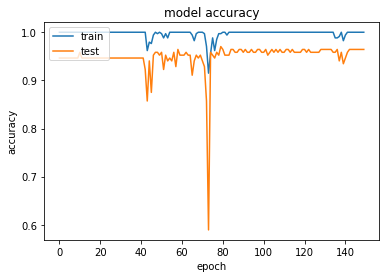

In [108]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

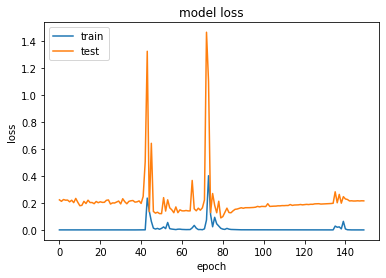

In [109]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Tuning of Hyperparameters :-

In [113]:
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
array=ff.values
array

array([[ 7. ,  0. , 86.2, ...,  0. ,  0. ,  1. ],
       [10. ,  5. , 90.6, ...,  1. ,  0. ,  1. ],
       [10. ,  2. , 90.6, ...,  1. ,  0. ,  1. ],
       ...,
       [ 1. ,  3. , 81.6, ...,  0. ,  0. ,  0. ],
       [ 1. ,  2. , 94.4, ...,  0. ,  0. ,  1. ],
       [ 9. ,  5. , 79.5, ...,  0. ,  0. ,  1. ]])

In [115]:
X = array[:,0:30]
y = array[:,30]

In [116]:
X

array([[ 7. ,  0. , 86.2, ...,  0. ,  0. ,  0. ],
       [10. ,  5. , 90.6, ...,  0. ,  1. ,  0. ],
       [10. ,  2. , 90.6, ...,  0. ,  1. ,  0. ],
       ...,
       [ 1. ,  3. , 81.6, ...,  0. ,  0. ,  0. ],
       [ 1. ,  2. , 94.4, ...,  0. ,  0. ,  0. ],
       [ 9. ,  5. , 79.5, ...,  1. ,  0. ,  0. ]])

In [117]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [119]:
# Standardization
from sklearn.preprocessing import StandardScaler 
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 

In [120]:
pd.DataFrame(X_standardized).describe() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,...,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02
mean,2.093937e-16,-1.382871e-16,-1.096700e-15,-7.852265e-18,-1.483206e-17,-8.986481e-17,1.832195e-16,1.797296e-16,2.225899e-16,-2.883526e-16,...,-4.740805e-16,1.013160e-16,-1.374146e-17,3.177986e-16,-3.446272e-17,3.167080e-16,-1.374146e-17,4.606662e-16,7.877349e-16,2.791916e-16
std,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,...,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00
min,-1.329184e+00,-1.424495e+00,-1.295805e+01,-1.712164e+00,-2.177385e+00,-1.969965e+00,-2.855946e+00,-1.789299e+00,-2.007272e+00,-6.903477e-02,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
25%,-1.100464e+00,-9.039866e-01,-7.532785e-02,-7.520348e-01,-4.439871e-01,-5.727610e-01,-5.938679e-01,-7.494866e-01,-7.288945e-01,-6.903477e-02,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
50%,4.313783e-02,1.370296e-01,1.769213e-01,-3.036890e-02,4.694951e-01,-1.361347e-01,7.447337e-02,-1.378325e-01,-6.333465e-03,-6.903477e-02,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
75%,1.186740e+00,6.575378e-01,4.111527e-01,4.873480e-01,6.699368e-01,4.314794e-01,6.742668e-01,5.349871e-01,4.939011e-01,-6.903477e-02,...,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,1.399751e+00
max,1.186740e+00,1.698554e+00,1.005740e+00,2.840606e+00,1.261583e+00,1.027740e+01,2.473647e+00,3.409762e+00,2.995074e+00,2.155478e+01,...,7.453560e+00,4.944694e+00,1.592168e+01,3.860861e+00,5.550901e+00,2.933219e+00,1.592168e+01,2.253886e+01,5.738757e+00,1.399751e+00


In [110]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

Tuning of Hyperparameters :- Batch Size and Epochs 

In [123]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(60, input_dim=30, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [124]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100,150,200]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y) 

C:\Users\admin\AppData\Local\Temp\ipykernel_9160\3338571140.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START batch_size=10, epochs=10...................................
[CV 1/5; 1/15] END ....batch_size=10, epochs=10;, score=0.902 total time=   1.7s
[CV 2/5; 1/15] START batch_size=10, epochs=10...................................
[CV 2/5; 1/15] END ....batch_size=10, epochs=10;, score=0.843 total time=   1.6s
[CV 3/5; 1/15] START batch_size=10, epochs=10...................................
[CV 3/5; 1/15] END ....batch_size=10, epochs=10;, score=0.863 total time=   1.7s
[CV 4/5; 1/15] START batch_size=10, epochs=10...................................
[CV 4/5; 1/15] END ....batch_size=10, epochs=10;, score=0.843 total time=   1.7s
[CV 5/5; 1/15] START batch_size=10, epochs=10...................................
[CV 5/5; 1/15] END ....batch_size=10, epochs=10;, score=0.851 total time=   1.7s
[CV 1/5; 2/15] START batch_size=10, epochs=50...................................
[CV 1/5; 2/15] END ....batch_size=10, epochs=50;

[CV 1/5; 11/15] END ...batch_size=40, epochs=10;, score=0.980 total time=   1.2s
[CV 2/5; 11/15] START batch_size=40, epochs=10..................................
[CV 2/5; 11/15] END ...batch_size=40, epochs=10;, score=0.814 total time=   1.5s
[CV 3/5; 11/15] START batch_size=40, epochs=10..................................
[CV 3/5; 11/15] END ...batch_size=40, epochs=10;, score=0.716 total time=   1.2s
[CV 4/5; 11/15] START batch_size=40, epochs=10..................................
[CV 4/5; 11/15] END ...batch_size=40, epochs=10;, score=0.794 total time=   1.2s
[CV 5/5; 11/15] START batch_size=40, epochs=10..................................
[CV 5/5; 11/15] END ...batch_size=40, epochs=10;, score=0.861 total time=   1.2s
[CV 1/5; 12/15] START batch_size=40, epochs=50..................................
[CV 1/5; 12/15] END ...batch_size=40, epochs=50;, score=1.000 total time=   2.0s
[CV 2/5; 12/15] START batch_size=40, epochs=50..................................
[CV 2/5; 12/15] END ...batch

In [125]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9115317344665528, using {'batch_size': 40, 'epochs': 150}
0.8604931116104126,0.02194645481362717 with: {'batch_size': 10, 'epochs': 10}
0.9017666459083558,0.05075513247631916 with: {'batch_size': 10, 'epochs': 50}
0.8938458442687989,0.05328546844677577 with: {'batch_size': 10, 'epochs': 100}
0.9095709443092346,0.045453980429149596 with: {'batch_size': 10, 'epochs': 150}
0.9017084002494812,0.050141196151143534 with: {'batch_size': 10, 'epochs': 200}
0.866375458240509,0.059736944965536984 with: {'batch_size': 20, 'epochs': 10}
0.893826425075531,0.05784566465611893 with: {'batch_size': 20, 'epochs': 50}
0.8997476100921631,0.04951397695889852 with: {'batch_size': 20, 'epochs': 100}
0.8997282028198242,0.05148110925821214 with: {'batch_size': 20, 'epochs': 150}
0.8879246592521668,0.057280001159521275 with: {'batch_size': 20, 'epochs': 200}
0.8330615282058715,0.08737970077156532 with: {'batch_size': 40, 'epochs': 10}
0.9056493759155273,0.05071226983594 with: {'batch_size': 40, 'epoch

##Tuning of Hyperparameters:- Learning rate and Drop out rate

In [128]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(60,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(30,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)
 

C:\Users\admin\AppData\Local\Temp\ipykernel_9160\737228361.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   1.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.765 total time=   1.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.529 total time=   1.2s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.696 total time=   1.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.723 total time=   1.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [129]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8448650717735291, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7406328916549683,0.14817539167178334 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8448650717735291,0.0793946124798751 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7250242710113526,0.13154393171771972 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7268879890441895,0.13666222438615333 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8310619115829467,0.08641252706831752 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7131236553192138,0.12323184360699452 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7406328916549683,0.14608490894125573 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8271403551101685,0.06745683211480934 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7406329035758972,0.15662656597021893 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


##Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [132]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(60,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(30,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


C:\Users\admin\AppData\Local\Temp\ipykernel_9160\2093509234.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   1.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.765 total time=   1.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.510 total time=   1.2s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.676 total time=   1.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.693 total time=   1.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.814 total time=   1.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.912 total time=   1.2s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.891 total time=   1.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.990 total time=   1.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.824 total time=   1.2s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.794 total time=   1.2s
[CV 4/5; 11/12] START activation_f

In [133]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.895806634426117, using {'activation_function': 'tanh', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8409823417663574,0.0743522646428695 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8546301603317261,0.06116162391971046 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.895806634426117,0.052642209080102115 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8880411505699157,0.06276511231576787 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8762570142745971,0.07579654387317418 with: {'activation_function'

##Tuning of Hyperparameter :-Number of Neurons in activation layer

In [135]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [15,30,45,60]
neuron2 = [5,15,30,45]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\admin\AppData\Local\Temp\ipykernel_9160\840882373.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START neuron1=15, neuron2=5......................................
[CV 1/5; 1/16] END .......neuron1=15, neuron2=5;, score=1.000 total time=   1.8s
[CV 2/5; 1/16] START neuron1=15, neuron2=5......................................
[CV 2/5; 1/16] END .......neuron1=15, neuron2=5;, score=0.833 total time=   1.6s
[CV 3/5; 1/16] START neuron1=15, neuron2=5......................................
[CV 3/5; 1/16] END .......neuron1=15, neuron2=5;, score=0.853 total time=   1.5s
[CV 4/5; 1/16] START neuron1=15, neuron2=5......................................
[CV 4/5; 1/16] END .......neuron1=15, neuron2=5;, score=0.873 total time=   1.4s
[CV 5/5; 1/16] START neuron1=15, neuron2=5......................................
[CV 5/5; 1/16] END .......neuron1=15, neuron2=5;, score=0.861 total time=   1.4s
[CV 1/5; 2/16] START neuron1=15, neuron2=15.....................................
[CV 1/5; 2/16] END ......neuron1=15, neuron2=15;

[CV 1/5; 11/16] END .....neuron1=45, neuron2=30;, score=1.000 total time=   1.8s
[CV 2/5; 11/16] START neuron1=45, neuron2=30....................................
[CV 2/5; 11/16] END .....neuron1=45, neuron2=30;, score=0.843 total time=   1.4s
[CV 3/5; 11/16] START neuron1=45, neuron2=30....................................
[CV 3/5; 11/16] END .....neuron1=45, neuron2=30;, score=0.833 total time=   1.4s
[CV 4/5; 11/16] START neuron1=45, neuron2=30....................................
[CV 4/5; 11/16] END .....neuron1=45, neuron2=30;, score=0.912 total time=   1.5s
[CV 5/5; 11/16] START neuron1=45, neuron2=30....................................
[CV 5/5; 11/16] END .....neuron1=45, neuron2=30;, score=0.881 total time=   1.4s
[CV 1/5; 12/16] START neuron1=45, neuron2=45....................................
[CV 1/5; 12/16] END .....neuron1=45, neuron2=45;, score=0.990 total time=   1.4s
[CV 2/5; 12/16] START neuron1=45, neuron2=45....................................
[CV 2/5; 12/16] END .....neu

In [136]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.8938846707344055, using {'neuron1': 15, 'neuron2': 15}
0.8840419173240661,0.05938058467144839 with: {'neuron1': 15, 'neuron2': 5}
0.8938846707344055,0.0599718718423568 with: {'neuron1': 15, 'neuron2': 15}
0.8742768287658691,0.06829347807805931 with: {'neuron1': 15, 'neuron2': 30}
0.8762570261955261,0.039426143887377064 with: {'neuron1': 15, 'neuron2': 45}
0.8644340872764588,0.06574780750833849 with: {'neuron1': 30, 'neuron2': 5}
0.8899825215339661,0.05796198134008055 with: {'neuron1': 30, 'neuron2': 15}
0.8781207442283631,0.040744848680461326 with: {'neuron1': 30, 'neuron2': 30}
0.8703746795654297,0.047693892038291046 with: {'neuron1': 30, 'neuron2': 45}
0.8664336919784545,0.07553870549568203 with: {'neuron1': 45, 'neuron2': 5}
0.8821005463600159,0.056874681432289284 with: {'neuron1': 45, 'neuron2': 15}
0.8938846707344055,0.0599718718423568 with: {'neuron1': 45, 'neuron2': 30}
0.8762376070022583,0.06154937358829766 with: {'neuron1': 45, 'neuron2': 45}
0.8663948535919189,0.0738

##Training model with optimum values of Hyperparameters

In [141]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(15,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(15,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 150)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print("accuracy_score : ", accuracy_score(y,y_predict))

C:\Users\admin\AppData\Local\Temp\ipykernel_9160\3099546051.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 150)


16/16 [==============================] - 0s 3ms/step
accuracy_score :  1.0


In [ ]:
## We got 100% accuracy by using model which is having optimum parameter values.